In [147]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import misc, linalg
from scipy.stats import skew
from PIL import Image
import copy
%matplotlib inline

### Problem 1

###### 1

In [62]:
v1 = [1, 2, 3, 4]
v2 = [0, 1, 0, 1]
v3 = [1, 4, 3, 6]
v4 = [2, 11, 6, 15]
matrix = [v1, v2, v3, v4]
#v5 is the vector not in the span
v5 = [1,1,1,1]
temp = copy.copy(matrix)
temp.append(v5)
np.linalg.matrix_rank(temp)
#v6 is the vector in span but different from others
v6 = [2,4,6,8]
temp.remove(v5)
temp.append(v6)
np.linalg.matrix_rank(temp)

2

###### 2

In [63]:
# there are two dimensions in the matrix
np.linalg.matrix_rank(matrix)

2

###### 3

In [145]:
# q is the orthonormal basis of the subspace
q = linalg.orth(np.array(matrix))
print q

[[-0.24011927  0.8581727 ]
 [-0.05990306 -0.29094143]
 [-0.35992538  0.27628983]
 [-0.89955994 -0.32024463]]


###### 4

### Problem 2

###### 1

In [65]:
mu1 = [0, 0, 0]
mu2 = [1, 1, 1]
sigma1 = [[0.5, 0, 0],[0, 0.5, 0],[0, 0, 0.7]]
sigma2 = [[0.5, 0, 0],[0, 0.5, 0],[0, 0, 0.01]]

label_1 = np.random.multivariate_normal(mu1, sigma1, 20)
label_2 = np.random.multivariate_normal(mu2, sigma2, 20)

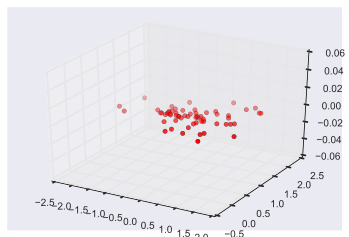

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(label_1, label_2, c = ['r'])
plt.show()

###### 2

If there are no color difference between the two labels, it just looks like a cluster of data points.

###### 3

In [67]:
label_3 = np.concatenate((label_1, label_2), axis = 0)
mean = np.mean(label_3, axis = 0)
cov = (label_3-mean).T.dot(label_3)

In [68]:
print cov

[[ 24.52563528   4.08500615  14.95528061]
 [  4.08500615  24.4112308    9.44980759]
 [ 14.95528061   9.44980759  22.90516727]]


###### 4

In [125]:
value, vector = sp.linalg.eig(cov)
print value; vector

[ 43.50329871+0.j   7.56346702+0.j  20.77526762+0.j]


array([[-0.61001535, -0.59689563,  0.52114958],
       [-0.45248723, -0.27751219, -0.84749176],
       [-0.65048949,  0.75279651,  0.10080095]])

In [131]:
# find the biggest eigen values 
eig_values = np.delete(vector, 1, 0)
print eig_values

[[-0.61001535 -0.59689563  0.52114958]
 [-0.65048949  0.75279651  0.10080095]]


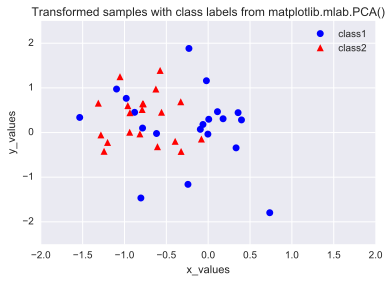

In [142]:
# It's still not very easy to distinguish one from another
plt.plot(np.dot(label_1, eig_vectors.T)[:, 0],np.dot(label_1, eig_vectors.T)[:, 1], 'o', markersize=7,\
        color='blue', alpha=0.5, label='class1')
plt.plot(np.dot(label_2, eig_vectors.T)[:, 0], np.dot(label_2, eig_vectors.T)[:, 1], '^', markersize=7,\
        color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-2,2])
plt.ylim([-2.5,2.5])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

### Problem 3

###### 1

2
(603, 400)


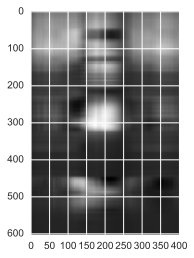

5
(603, 400)


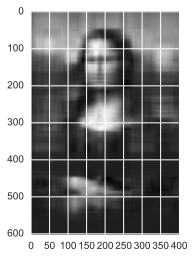

10
(603, 400)


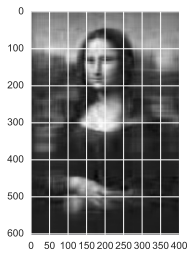

In [72]:
picture = np.asarray(Image.open('mona_lisa.png').convert('L'))
U,d,Vt = np.linalg.svd(picture)
D = linalg.diagsvd(d, picture.shape[0], picture.shape[1])
for k in (2, 5, 10):
    D1 = D.copy()
    D1[D1 < d[int(k)]] = 0.
    print int(k)
    X1 = np.dot(np.dot(U, D1), Vt)
    print X1.shape
    plt.imshow(X1, 'gray')
    plt.show()

###### 2

In [73]:
for r in (2, 5, 10):
    total = 603 * r + r + r * 400
    print 'The rank {} has {} bytes.'.format(r, total * 2)

The rank 2 has 4016 bytes.
The rank 5 has 10040 bytes.
The rank 10 has 20080 bytes.


### Problem 4

###### 2

In [149]:
train = pd.read_csv("kaggle-train.csv")
test = pd.read_csv("kaggle-test.csv")

In [150]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [151]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1141a7850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116491890>]], dtype=object)

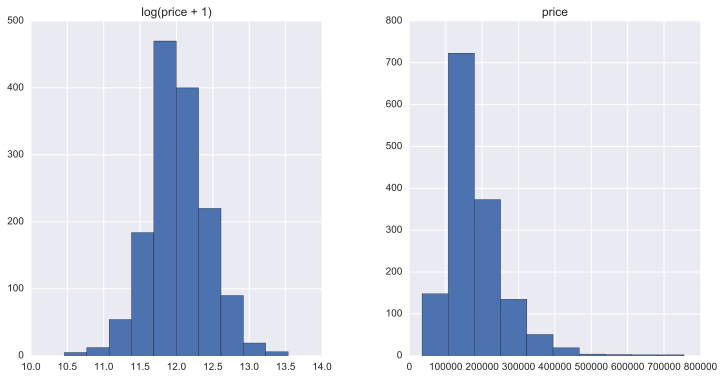

In [152]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [153]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [154]:
all_data = pd.get_dummies(all_data)

In [155]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [156]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [157]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)

In [158]:
model_ridge = Ridge()

In [163]:
# the rmse for alpha = 0.1 is 0.1377
alphas = 0.1
rmse = rmse_cv(Ridge(alpha = alphas)).mean()
print rmse

0.137775382772


###### 3

In [165]:
# this is the final model, i pick the set with the least rmse mean, and the best I got is .27553
model_lasso = LassoCV(alphas = [20, 15, 10, 5, 1]).fit(X_train, y)

In [166]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)

In [168]:
alphas = [20, 15, 10, 5, 1]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

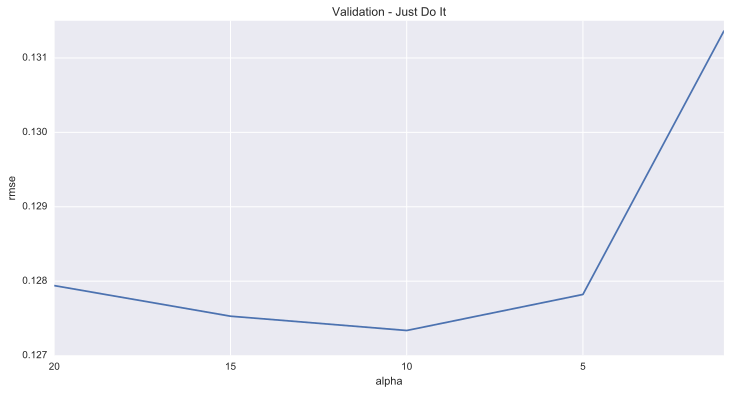

In [169]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [170]:
preds = np.expm1(model_lasso.predict(X_test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)